## Import libraries

In [1]:
# for main
from __future__ import print_function, unicode_literals, absolute_import, division

import os
import sys
import numpy as np
import argparse
from argparse import RawTextHelpFormatter
from glob import glob
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import json
import re



# custom
from singleCell_export import slice_export




In [2]:
## Variables
wd = "/sudoku/train/HUVEC-23/Plate1/converted_rgb/"
img_format = "png"
meta_wd = "/sudoku/meta_train/HUVEC-23/Plate1"
crop_size=90
out = "/home/aogorodnikov/test_crop"
pt=1


In [3]:
X_names = pd.DataFrame(sorted(glob(os.path.join(wd, '*.'+img_format+'*'))))
X_names['base'] = X_names.loc[:, 0].str.split(pat="/", expand=True)[3]
X_names['field'] = X_names.loc[:, 0].str.extract(r'(s\d+)')
X_names['file_name'] = X_names.loc[:, 0].str.extract(r'([A-Z]\d+_s\d+)')

In [19]:
X_names.iloc[i, 0]

'/sudoku/train/HUVEC-23/Plate1/converted_rgb/D14_s1_00.png'

In [17]:
json_regex = re.compile(X_names.file_name[i])
json_regex
#list(filter(json_regex.search, json_files))
#json_match = list(filter(json_regex.search, json_files))
#assert (len(json_match) == 1), "Crop_module ERROR: multiple matches detected for JSON files"
#json_fileName = json_match[0]

re.compile(r'D14_s1', re.UNICODE)

## **Main function**

In [ ]:
json_files = glob(os.path.join(meta_wd, '*.json'))
for i in range(X_names.shape[0]):

    print("Starting image {}".format(X_names.file_name[i]))
    sys.stdout.flush()

    # import image
    X = cv2.imread(X_names.iloc[i, 0], -1)

    # import meta data in JSON
    json_regex = re.compile(X_names.file_name[i])
    json_match = list(filter(json_regex.search, json_files))
    try:
        json_fileName = json_match[0]
    except IndexError:
        continue
    assert (len(json_match) == 1), "Crop_module ERROR: multiple matches detected for JSON files. Make your regex unique"
    
    try:
        with open(json_fileName) as json_file:
            data = json.load(json_file)
    except FileNotFoundError:
        continue


    for j in range(len(data["points"])):
        crop_img = slice_export(img=X, points=data["points"][j], size=crop_size)
        if crop_img.size == 0:
            continue

        # export
        cv2.imwrite(os.path.join(out, "_".join(['Pt{0:02d}'.format(pt),
                                                X_names['base'][i],
                                                X_names['file_name'][i],
                                                '{0:04d}.'.format(j) + str(img_format)])), crop_img)

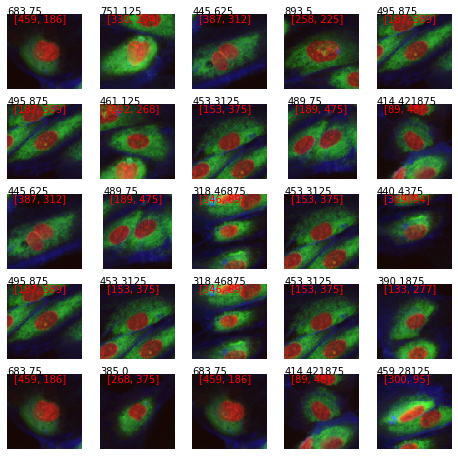

In [25]:
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for k in range(1, columns * rows + 1):
    rand_select = np.random.choice(range(1, len(data["points"])))
    p = data["points"][rand_select]
    lol = data['area'][rand_select]
    img_crop = slice_export(img=X, points=p, size=crop_size)
    if img_crop.size == 0:
        continue
    fig.add_subplot(rows, columns, k)
    plt.text(0, 0, s=lol)
    plt.text(8, 8, s=p, color='red')
    plt.imshow(img_crop);
    plt.axis('off')
    
    plt.savefig(fname=os.path.join(out, "_".join(['Pt{0:02d}'.format(pt),
                                                        X_names['base'][i],
                                                        X_names['file_name'][i], 'example.pdf'])))